In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
# Exponential Distribution approximated in a finite number of discrete intervals with stochastic values realized from a coninuous uniform distribution

#parameters
lambda_param = 1.5 #rate parameter

n = 100000 #number of realizations
unif_num = np.random.uniform(0,1,n) #uniform realizations stored in an array

chart_end = 5/lambda_param #endpoint to x axis for graphing
resolution = 75 #total amount of discrete intervals to approximate the continuous PDF
interval = (chart_end) / resolution #length of one interval

arr_success = np.zeros(resolution) #array of the discrete intervals to count successes when they occur

num_counted = 0 #amount of realizations counted

#if the value is less than (1 - e^(-lambda * x)) consider the realization a success
for i in range(n):

    j = 0 #scalar to check if a success occurs in the jth interval

    while(num_counted <= i):

        if(unif_num[i] < 1 - math.exp(-lambda_param * (j * interval))): #if success in interval j
 
            if(j<resolution): #if the success falls on the graph
                arr_success[j] += 1 #add success to respective interval

            num_counted+=1 #count the realization
        
        else: #if not a success in interval j
            j+=1 #move to next interval

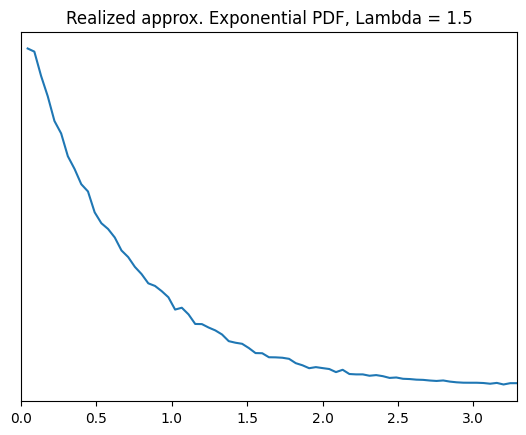

In [21]:
arr_success = arr_success[1:] #remove the 0th zone as the support is x>0

x_titles = np.arange(resolution) * interval #end values of each interval 
x_titles = x_titles[1:] #remove the 0th zone as the support is x>0

plot_title = f"Realized approx. Exponential PDF, Lambda = {lambda_param}"

plt.title(plot_title)
plt.plot(x_titles, arr_success)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim(0, chart_end - interval)
plt.show()